In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as dt

In [2]:
def day_of_period(y,m,d,y0):

    '''This function takes a date in y,m,d format and returns the value of the
    days since jan 1, y0 (the time convention of reanalysis). Inputs are integers. 
    Output is an integer.''' 
    
    d0 = datetime(y0,1,1) # the datetime object representing 12am, jan 1 of the baseline year of the reanalysis
    d = datetime(y,m,d) # the datetime object for the day and time being tested
    
    t = dt.date2num(d) - dt.date2num(d0) # number of hours since 12am, jan 1 of the baseline year
    # dt.date2num gives the number of days since the python datetime time origin. 
    
    return int(t)

In [3]:
save_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/Feb24/'

# Load the data files
mu_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Acacia_Lows/closed_lows_mu_era5_2017_sea.txt'
pg_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Nick_Lows/closed_lows_pg_era5_2017_sea.txt'
pv_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Portmann_Lows/pv_cutoffs_sea.txt'
r13_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/R13/pook2009lows.txt'

mu_array = np.loadtxt(mu_file_str, delimiter = ',')
pg_array = np.loadtxt(pg_file_str, delimiter = ',')
pv_array = np.loadtxt(pv_file_str, delimiter = ',')
r13_array = np.loadtxt(r13_file_str, delimiter = ',')

In [4]:
# Construct the array of yearly totals here
years = np.unique(pg_array[:,1])

year_systems = np.zeros((len(years), 4), dtype = float)

for ii in range(len(years)):

    year_systems[ii,0] = int(years[ii])

    # Get the number of systems for the pg dataset
    year_lows_pg = pg_array[pg_array[:,1] == years[ii], :]
    year_systems_pg = np.shape(year_lows_pg[:,5])[0]/4
    year_systems[ii,1] = year_systems_pg

    # Get the number of systems for the mu dataset
    year_lows_mu = mu_array[mu_array[:,1] == years[ii], :]
    year_systems_mu = np.shape(year_lows_mu[:,5])[0]/4
    year_systems[ii,2] = year_systems_mu

    # Get the number of systems for the mpv dataset
    year_lows_pv = pv_array[pv_array[:,0] == years[ii], :]
    year_systems_pv = np.shape(year_lows_pv)[0]/4
    year_systems[ii,3] = year_systems_pv


In [5]:
# Construct the array of cool-season totals here
years = np.unique(pg_array[:,1])

year_systems_cool = np.zeros((len(years), 5), dtype = float)

for ii in range(len(years)):

    year_systems_cool[ii,0] = int(years[ii])

    # Get the number of systems for the pg dataset
    year_lows_cool_pg = pg_array[(pg_array[:,1] == years[ii]) & (pg_array[:,2] >= 4) & (pg_array[:,2] <= 10), :]
    year_systems_cool_pg = np.shape(year_lows_cool_pg[:,5])[0]/4
    year_systems_cool[ii,1] = year_systems_cool_pg

    # Get the number of systems for the mu dataset
    year_lows_cool_mu = mu_array[(mu_array[:,1] == years[ii]) & (mu_array[:,2] >= 4) & (mu_array[:,2] <= 10), :]
    year_systems_cool_mu = np.shape(year_lows_cool_mu[:,5])[0]/4
    year_systems_cool[ii,2] = year_systems_cool_mu

    # Get the number of systems for the pv dataset
    year_lows_cool_pv = pv_array[(pv_array[:,0] == years[ii]) & (pv_array[:,1] >= 4) & (pv_array[:,1] <= 10), :]
    year_systems_cool_pv = np.shape(year_lows_cool_pv)[0]/4
    year_systems_cool[ii,3] = year_systems_cool_pv

    # Get the number of systems for the r13 dataset
    if years[ii] < 2010:
        year_lows_cool_r13 = r13_array[(r13_array[:,0] == years[ii]) & (r13_array[:,1] >= 4) & (r13_array[:,1] <= 10), :]
        year_systems_cool_r13 = np.shape(year_lows_cool_r13)[0] # the r13 dataset has only one entry for each day
        year_systems_cool[ii,4] = year_systems_cool_r13

In [13]:
# Construct the array of warm-season totals here
years = np.unique(pg_array[:,1])

# len(years) - 1 because the nov-dec from one year will be combined with the jan-march of the next
year_systems_warm = np.zeros((len(years) - 1, 5), dtype = float)

for ii in range(len(years) - 1):

    year_systems_warm[ii,0] = int(years[ii])

    # Get the number of systems for the pg dataset
    year_lows_warm_pg = pg_array[(pg_array[:,1] == years[ii]) & ((pg_array[:,2] < 4) | (pg_array[:,2] > 10)), :]
    #year_lows_warm_pg = pg_array[((pg_array[:,1] == years[ii]) & (pg_array[:,2] < 4)) | ((pg_array[:,1] == years[ii] + 1) & (pg_array[:,2] > 10)), :]
    year_systems_warm_pg = np.shape(year_lows_warm_pg[:,5])[0]/4
    year_systems_warm[ii,1] = year_systems_warm_pg

    # Get the number of systems for the mu dataset
    year_lows_warm_mu = mu_array[(mu_array[:,1] == years[ii]) & ((mu_array[:,2] < 4) | (mu_array[:,2] > 10)), :]
    #year_lows_warm_mu = mu_array[((mu_array[:,1] == years[ii]) & (mu_array[:,2] < 4)) | ((mu_array[:,1] == years[ii] + 1) & (mu_array[:,2] > 10)), :]
    year_systems_warm_mu = np.shape(year_lows_warm_mu[:,5])[0]/4
    year_systems_warm[ii,2] = year_systems_warm_mu

    # Get the number of systems for the pv dataset
    year_lows_warm_pv = pv_array[(pv_array[:,0] == years[ii]) & ((pv_array[:,1] < 4) | (pv_array[:,1] > 10)), :]
    #year_lows_warm_pv = pv_array[((pv_array[:,1] == years[ii]) & (pv_array[:,2] < 4)) | ((pv_array[:,1] == years[ii] + 1) & (pv_array[:,2] > 10)), :]
    year_systems_warm_pv = np.shape(year_lows_warm_pv)[0]/4
    year_systems_warm[ii,3] = year_systems_warm_pv

In [14]:
year_systems_warm

array([[1979.  ,   17.5 ,   16.75,   15.75,    0.  ],
       [1980.  ,   16.  ,   15.5 ,   16.75,    0.  ],
       [1981.  ,   23.  ,   23.  ,   23.5 ,    0.  ],
       [1982.  ,   11.5 ,   10.  ,   10.75,    0.  ],
       [1983.  ,   22.  ,   21.5 ,   16.25,    0.  ],
       [1984.  ,   17.5 ,   16.25,   21.25,    0.  ],
       [1985.  ,   35.5 ,   32.5 ,   27.  ,    0.  ],
       [1986.  ,    8.75,    7.75,   13.25,    0.  ],
       [1987.  ,   23.5 ,   21.75,   14.25,    0.  ],
       [1988.  ,   27.  ,   27.  ,   24.25,    0.  ],
       [1989.  ,   21.5 ,   24.5 ,   27.5 ,    0.  ],
       [1990.  ,   22.75,   23.5 ,   19.5 ,    0.  ],
       [1991.  ,   18.  ,   17.5 ,   25.5 ,    0.  ],
       [1992.  ,   35.75,   38.5 ,   16.75,    0.  ],
       [1993.  ,   20.25,   21.25,   20.25,    0.  ],
       [1994.  ,   19.25,   18.  ,   17.75,    0.  ],
       [1995.  ,   28.5 ,   29.75,   24.75,    0.  ],
       [1996.  ,   18.75,   19.25,   20.25,    0.  ],
       [1997.  ,   16.  ,   

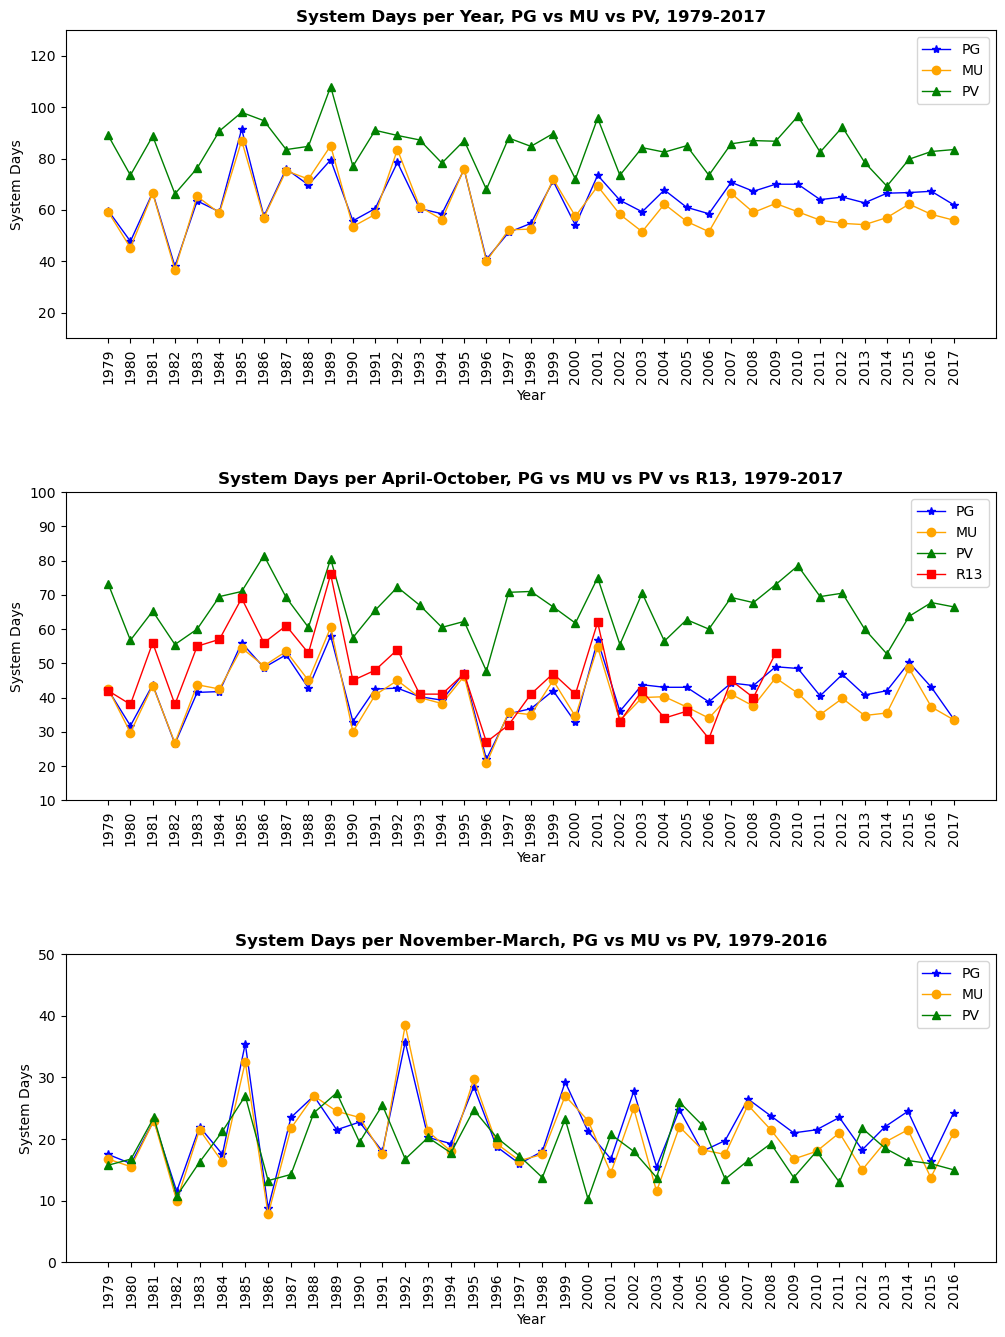

In [18]:
# Year time series

# Create a plot(figure) object, and then an axes object on that plot object
fig = plt.figure(figsize = (12,16))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3) # Where the numbers refer to (rows, cols, plot number). 

# Whole year plot 

# Set the axes attributes for the yearly plot here
ax1.set_title('System Days per Year, PG vs MU vs PV, 1979-2017', weight = 'bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('System Days')

years_ints = year_systems[:,0].astype(int)

ax1.set_ylim(10, 130)
ax1.set_xticks(year_systems[:,0])
ax1.set_xticklabels(years_ints, rotation = 'vertical')

ax1.plot(year_systems[:,0], year_systems[:,1], color='blue', marker='*',linewidth=1, markersize=6)
ax1.plot(year_systems[:,0], year_systems[:,2], color='orange', marker='o',linewidth=1, markersize=6)
ax1.plot(year_systems[:,0], year_systems[:,3], color='green', marker='^',linewidth=1, markersize=6)

ax1.legend(['PG', 'MU', 'PV'], loc = 'upper right')

# Cool-season plot 

# Set the axes attributes for the yearly plot here
ax2.set_title('System Days per April-October, PG vs MU vs PV vs R13, 1979-2017', weight = 'bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('System Days')

years_ints_cool = year_systems_cool[:,0].astype(int)

ax2.set_ylim(10, 100)
ax2.set_xticks(year_systems_cool[:,0])
ax2.set_xticklabels(years_ints_cool, rotation = 'vertical')

ax2.plot(year_systems_cool[:,0], year_systems_cool[:,1], color='blue', marker='*',linewidth=1, markersize=6)
ax2.plot(year_systems_cool[:,0], year_systems_cool[:,2], color='orange', marker='o',linewidth=1, markersize=6)
ax2.plot(year_systems_cool[:,0], year_systems_cool[:,3], color='green', marker='^',linewidth=1, markersize=6)
ax2.plot(year_systems_cool[:31,0], year_systems_cool[:31,4], color='red', marker='s',linewidth=1, markersize=6)
# the limit to the first 31 rows is for the years of R13 dataset (1979-2009). 

ax2.legend(['PG', 'MU', 'PV', 'R13'], loc = 'upper right')

# Warm-season plot 

# Set the axes attributes for the yearly plot here
ax3.set_title('System Days per November-March, PG vs MU vs PV, 1979-2016', weight = 'bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('System Days')

years_ints_warm = year_systems_warm[:,0].astype(int)

ax3.set_ylim(0, 50)
ax3.set_xticks(year_systems_warm[:,0])
ax3.set_xticklabels(years_ints_warm, rotation = 'vertical')

ax3.plot(year_systems_warm[:,0], year_systems_warm[:,1], color='blue', marker='*',linewidth=1, markersize=6)
ax3.plot(year_systems_warm[:,0], year_systems_warm[:,2], color='orange', marker='o',linewidth=1, markersize=6)
ax3.plot(year_systems_warm[:,0], year_systems_warm[:,3], color='green', marker='^',linewidth=1, markersize=6)

ax3.legend(['PG', 'MU', 'PV'], loc = 'upper right')

# Tighten up the spacing of the subplots
plt.subplots_adjust(hspace = 0.5)

plt.savefig(save_path + 'systems_timeseries_multi.png', format = 'png', bbox_inches = 'tight') 

plt.show()

In [20]:
# compute standard deviations pre-and-post 2000 here
import pandas as pd

stds = np.zeros((10,2))

# pg all
stds[0,0] = np.std(year_systems[:22,1])/ np.mean(year_systems[:22,1]) # pre-2001
stds[0,1] = np.std(year_systems[22:,1])/ np.mean(year_systems[22:,1])  # post-2001

# mu all
stds[1,0] = np.std(year_systems[:22,2])/ np.mean(year_systems[:22,2])  # pre-2001
stds[1,1] = np.std(year_systems[22:,2])/ np.mean(year_systems[22:,2])  # post-2001

# pv all
stds[2,0] = np.std(year_systems[:22,3])/ np.mean(year_systems[:22,3])  # pre-2001
stds[2,1] = np.std(year_systems[22:,3])/ np.mean(year_systems[22:,3])  # post-2001

# pg cool
stds[3,0] = np.std(year_systems_cool[:22,1])/ np.mean(year_systems_cool[:22,1])  # pre-2001
stds[3,1] = np.std(year_systems_cool[22:,1])/ np.mean(year_systems_cool[22:,1])  # post-2001

# mu cool
stds[4,0] = np.std(year_systems_cool[:22,2])/ np.mean(year_systems_cool[:22,2])  # pre-2001
stds[4,1] = np.std(year_systems_cool[22:,2])/ np.mean(year_systems_cool[22:,2])  # post-2001

# pv cool
stds[5,0] = np.std(year_systems_cool[:22,3])/ np.mean(year_systems_cool[:22,3])  # pre-2001
stds[5,1] = np.std(year_systems_cool[22:,3])/ np.mean(year_systems_cool[22:,3])  # post-2001

# r13 cool
stds[6,0] = np.std(year_systems_cool[:22,4])/ np.mean(year_systems_cool[:22,4])  # pre-2001
stds[6,1] = np.std(year_systems_cool[22:31,4])/ np.mean(year_systems_cool[22:31,4])  # post-2001

# pg warm
stds[7,0] = np.std(year_systems_warm[:22,1])/ np.mean(year_systems_warm[:22,1])  # pre-2001
stds[7,1] = np.std(year_systems_warm[22:,1])/ np.mean(year_systems_warm[22:,1])  # post-2001

# mu warm
stds[8,0] = np.std(year_systems_warm[:22,2])/ np.mean(year_systems_warm[:22,2])  # pre-2001
stds[8,1] = np.std(year_systems_warm[22:,2])/ np.mean(year_systems_warm[22:,2])  # post-2001

# pv warm
stds[9,0] = np.std(year_systems_warm[:22,3])/ np.mean(year_systems_warm[:22,3])  # pre-2001
stds[9,1] = np.std(year_systems_warm[22:,3])/ np.mean(year_systems_warm[22:,3])  # post-2001

rows = ['pg_year', 'mu_year', 'pv_year', 'pg_cool', 'mu_cool', 'pv_cool', 'r13_cool', 'pg_warm', 'mu_warm', 'pv_warm']
cols = ['std_pre_2000', 'std_post_2000']

stnd_devs = pd.DataFrame(stds, index = rows, columns = cols)
stnd_devs

,std_pre_2000,std_post_2000
pg_year,0.203980,0.061726
mu_year,0.216026,0.080698
pv_year,0.114620,0.085753
pg_cool,0.209156,0.121504
mu_cool,0.223825,0.142734
pv_cool,0.119974,0.105417
r13_cool,0.235089,0.242387
pg_warm,0.305020,0.168456
mu_warm,0.322556,0.203627
pv_warm,0.261207,0.201482


In [21]:
np.where(year_systems[:,:] == 2000)

(array([21]), array([0]))

In [ ]:
# try re-computing as coefficient of variation